# Import and Setup

In [26]:
import datetime as dt
import pandas as pd
import numpy as np
import glob
from matplotlib.ticker import MultipleLocator
from pynverse import inversefunc
import datetime as dt

In [27]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [28]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [29]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

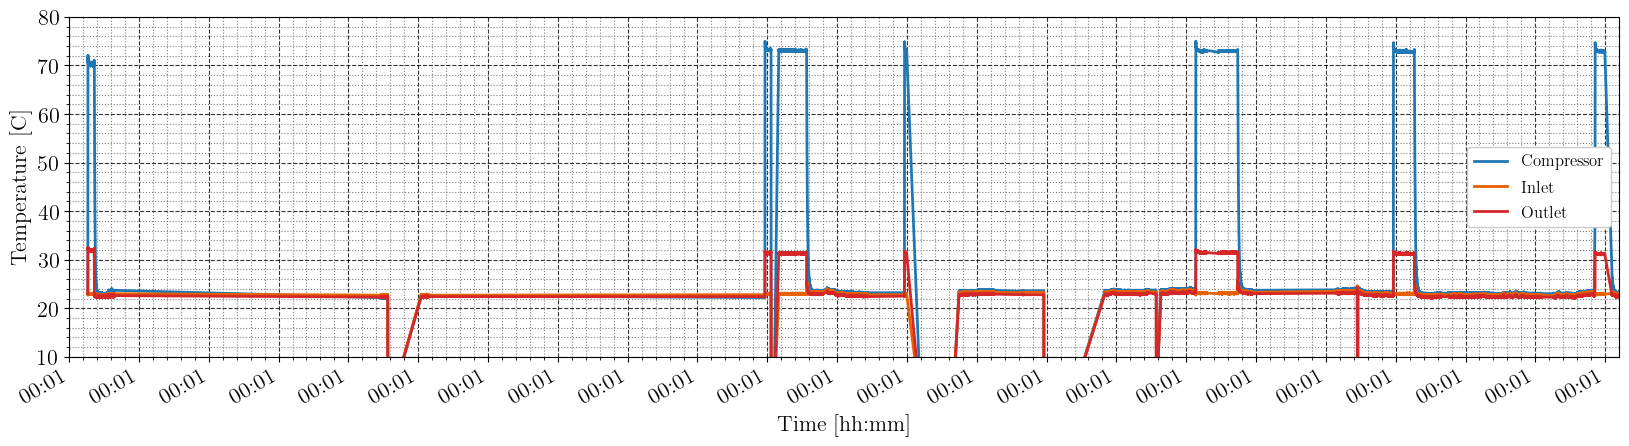

In [30]:
Sensors = []
# Files = ['C:/Data/StandStatus/20220304.h5','C:/Data/StandStatus/20220304.h5']
PATH='C:/Data/StandStatus/Compressor/'
Files = glob.glob(PATH+'*.h5*')
# print(Files)
for File in Files: 
    # print(File)
    try:
        Sensor = Monitor.SensorData(Filepath=File)
        Sensor.GetData()
        Sensors.append(Sensor)
    except IndexError as e:
        continue
    except OSError as ose:
        continue
AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2022,3,1,0,0), dt.datetime(2022,10,8,23,59)]
AllSensors.PlotData(Data=AllSensors.Compressor, Selection='Compressor', XTicks=14400, YTicks=10, XRange=XRange, YRange=[10,80], Bin=100)